## Problem Information

**Dataset:** Students' Dropout and Academic Success

**Source:** [UCI Machine Learning Repository] (https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

**Task:** Supervised Learning Problem - Classification


This dataset contains student records with features related to their demographics, academic performance, and enrollment. 

**Target Variable:** Indicates whether a student successfully graduated, dropped out, or is still enrolled. 

**Aim:** To predict student outcomes based on these features.

**Additional Notes:** df_temp is used throughout for any substantial changes being carried out within a cell that may impact other cells.

## Importing Libraries

In [235]:
import pandas as pd                                  # Data Manipulation and Analysis 
import seaborn as sns                                # Statistical visualisations/ graphics
import matplotlib.pyplot as plt                      # Visualisations
import numpy as np                                   # Mathematical functions
from sklearn.preprocessing import LabelEncoder       # Mapping categorical values to unique integers
from sklearn.model_selection import train_test_split # Dataset splitting
import plotly.graph_objects as go                    # Interactive treemap graphs
import textwrap                                      # Text wrap visualisation labels and ticks

## Data Acquistion and Initial Preparation

### Dataset Import

In [143]:
# Read CSV dataset into a DataFrame
df = pd.read_csv("data/data.csv", delimiter=";")
# Check first 10 rows
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [144]:
# Rename columns for clarity
df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age', 'Daytime/evening attendance\t':'Daytime/Evening'}, inplace = True)

In [145]:
# Check if any null values present in the dataset
df.isnull().any().any()

np.False_

In [146]:
# Check column datatypes
df.dtypes.reset_index().rename(columns={"index":"Column", 0:"Datatype"}) 

,Column,Datatype
0,Marital status,int64
1,Application mode,int64
2,Application order,int64
3,Course,int64
4,Daytime/Evening,int64
5,Previous qualification,int64
6,Previous qualification (grade),float64
7,Nationality,int64
8,Mother's qualification,int64
9,Father's qualification,int64


## Exploratory Data Analysis (EDA)

In [147]:
df_eda = df.copy(deep=True)
# Descriptive Statistics
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/Evening,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nationality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


#### Feature Mappings

In [148]:
# Number of unique non-binary categories - columns that may require aggregation 
df_eda.nunique()[(df_eda.nunique() > 2) # Filter > 2 
                               & (~df_eda.nunique().index.str.contains("grade|units|rate|GDP", case=False)) # Exclude numerical variables i.e. 'grade' 
                               & (~df_eda.nunique().index.isin(["Age", "Application order", "Target"]))]

Marital status             6
Application mode          18
Course                    17
Previous qualification    17
Nationality               21
Mother's qualification    29
Father's qualification    34
Mother's occupation       32
Father's occupation       46
dtype: int64

In [149]:
# Feature mappings (for aggregation purposes)
# Marital Status
marital_mapping = {
    1: "Single",
    2: "Married",
    3: "Widower",
    4: "Divorced",
    5: "Common-law marriage",
    6: "Legally separated"
}

# Application Mode
appl_mode_mapping = {
    1: "1st Phase - General Contingent",
    2: "Ordinance No. 612/93",
    5: "1st Phase - Special Contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st Phase - Special Contingent (Madeira Island)",
    17: "2nd Phase - General Contingent",
    18: "3rd Phase - General Contingent",
    26: "Ordinance No. 533-A/99, item b2 (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of Course",
    44: "Technological Specialization Diploma Holders",
    51: "Change of Institution/Course",
    53: "Short Cycle Diploma Holders",
    57: "Change of Institution/Course (International)"
}

# Nationality 
nationality_mapping = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldovan",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

# Previous/ Mother's/ Father's Qualification
prev_qual_mapping = {
    1: "Secondary Education - 12th Year or Eq.",
    2: "Bachelor's",
    3: "Higher Ed. Degree",
    4: "Master's",
    5: "Doctorate",
    6: "Frequency of Higher Ed.",
    9: "12th Year - Not Completed",
    10: "11th Year - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year",
    13: "2nd Year Complementary High School",
    14: "10th Year",
    15: "10th Year - Not Completed",
    18: "General Commerce Course",
    19: "Basic Ed. 3rd Cycle (9th–11th)",
    20: "Complementary High School Course",
    22: "Technical-professional Course",
    25: "Complementary High School - Not Concluded",
    26: "7th Year of Schooling",
    27: "2nd Cycle General High School",
    29: "9th Year - Not Completed",
    30: "8th Year",
    31: "General Course of Administration & Commerce",
    33: "Supplementary Accounting & Administration",
    34: "Unknown",
    35: "Illiterate",
    36: "Can Read (without 4th Year)",
    37: "Basic Ed. 1st Cycle",
    38: "Basic Ed. 2nd Cycle",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Master (2nd Cycle)",
    44: "Doctorate (3rd Cycle)"
}

# Parent's occupation - shortened for clarity and readbility
occupation_mapping = {
    0: "Student",
    1: "Legislative, Executive, and Managerial Leaders",
    2: "Intellectual and Scientific Specialists",
    3: "Technicians and Professionals (Intermediate)",
    4: "Admin",
    5: "Personal, Security & Sales Workers",
    6: "Agricultural Workers",
    7: "Industry, Construction & Craft Workers",
    8: "Machine Operators & Assemblers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces Personnel",
    112: "Administrative and Commercial Directors",
    114: "Hotel, Catering & Trade Directors",
    121: "Physical Sciences, Math & Engineering Specialists",
    122: "Health Professionals",
    123: "Teachers",
    124: "Finance, Accounting, Relations, & Admin Specialistss",
    125: "ICT Specialists",
    131: "Science & Engineering Technicians (Intermediate)",
    132: "Health Technicians & Professionals (Intermediate)",
    134: "Legal, Social, Cultural & Sports Technicians (Intermediate)",
    135: "ICT Technicians",
    141: "Office Workers & Secretaries",
    143: "Data, Accounting & Registry Operators",
    144: "Admin Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Care Workers",
    154: "Security Services Personnel",
    161: "Market-oriented Farmers & Skilled Agricultural Workers",
    163: "Subsistence Farmers, Fishers & Hunters",
    171: "Construction Workers",
    172: "Metallurgy & Metalworking Workers",
    173: "Artisan Workers",
    174: "Electrical & Electronics Workers",
    175: "Food, Wood, Clothing, and Other Craft Workers",
    181: "Plant Machinery Operators",
    182: "Assembly Workers",
    183: "Vehicle and Mobile Equipment Operators",
    191: "Cleaning Workers",
    192: "Unskilled Agricultural and Forestry",
    193: "Unskilled Industry, Construction, and Transport Workers",
    194: "Meal Prep Assistants",
    195: "Street Vendors & Service Providers Excl. Food"
}

gender_mapping ={
    1: "Male", 
    0: "Female"
}

# Combine to keyed dictionary - Column to Mapping
feature_mappings = {
    "Marital status": marital_mapping,
    "Application mode": appl_mode_mapping,
    "Nationality": nationality_mapping,
    "Previous qualification": prev_qual_mapping,
    "Mother's qualification": prev_qual_mapping,
    "Father's qualification": prev_qual_mapping,
    "Mother's occupation": occupation_mapping,
    "Father's occupation": occupation_mapping,
    "Gender": gender_mapping
}

In [150]:
# Ensure and validate mapped codes align with values in the DataFrame
def cross_ref_mappings(column_name, df=df_eda, mappings=feature_mappings):
    try:
        # Unique feature codes
        target_codes = set(df[column_name].unique())
        # Mapped codes
        mapped_codes = set(feature_mappings[column_name].keys())
        # Check for missing codes in mapping from df
        missing_codes = target_codes - mapped_codes
        
        # Return attribute, names of missing codes, True/False
        return column_name, missing_codes, bool(missing_codes)
        
    except KeyError:
        raise Exception("Mapping does not exist for this column!")
    
# Check each feature with a mapping from combined dict 
col_params = []
for key in feature_mappings:
    col_params.append(key)

missing_results = "Missing codes for" # Concatenate missing codes for columns
non_missing_cols = "No missing codes for" # Concatenate non-missing columns
missing_count = 0 # Missing count

for col in col_params:
    column_name, missing_codes, missing = cross_ref_mappings(col)
    if missing:
        missing_results += ", " + column_name + ": " + ", ".join(str(v) for v in missing_codes)
        missing_count += 1
    else: 
        non_missing_cols += ", " + column_name

ref_results = "" # Concatenate full results

# Shows if any mappings are missing
if missing_count > 0:
    ref_results += missing_results + "."
# If mappings are not missing for column(s)
ref_results += "\n" + non_missing_cols + "."

print(ref_results)


No missing codes for, Marital status, Application mode, Nationality, Previous qualification, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Gender.


### Univariate Analysis

#### Target Variable

##### Distribution

In [151]:
sns.set_style("whitegrid") # Set style for univariate plots

def countplot_target_distribution(df, labels, column='Target'):
    """
    lorem ipsum
    """
    df_plot = df.copy() # Copy to not alter original 

    # Barplot of target veriable class count
    plt.figure(figsize=(7,6))
    ax = sns.countplot(
        data=df_plot, 
        x=column, 
        palette='muted'
    )

    # Plot labels
    ax.set_title("Distribution of Target Classes")
    ax.set_xlabel('Target Class (Student Outcome)')
    ax.set_ylabel('Count')
    ax.set_xticklabels(labels)

    
    # Count of each bar as label
    for container in ax.containers:
        ax.bar_label(container, fmt='{:.0f}', label_type='edge')

    plt.tight_layout()
    plt.show()

C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\3284196427.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\3284196427.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


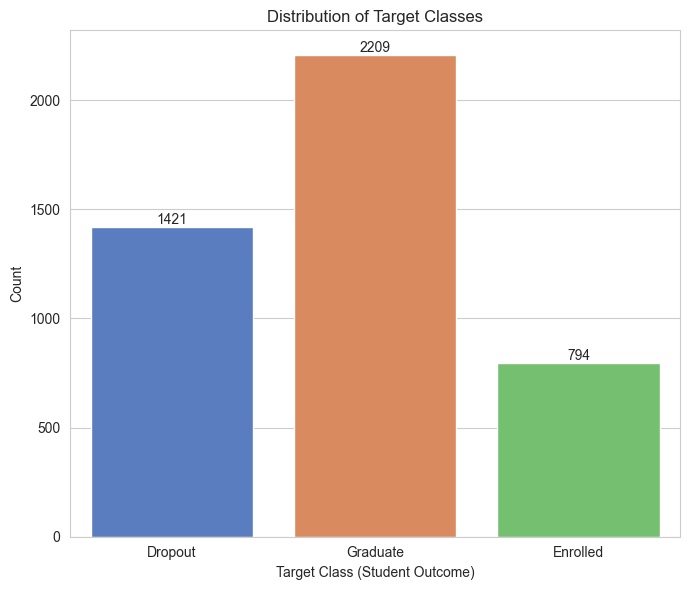

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [152]:
# Target distribution
countplot_target_distribution(df_eda, ('Dropout', 'Graduate', 'Enrolled'))
df['Target'].value_counts() # Check values match-up against original

C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\3284196427.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\3284196427.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


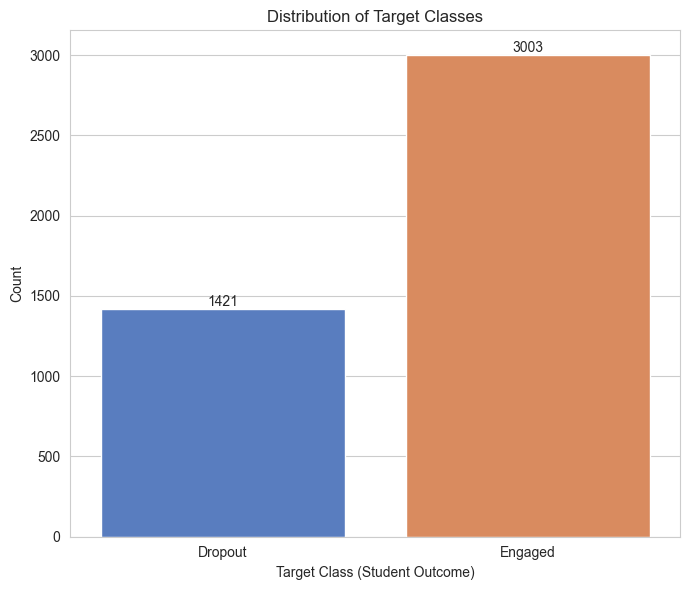

In [153]:
# Target combined distribution
df_temp = df_eda.copy()
df_temp['Target'] = df_temp['Target'].replace({
    'Graduate':'Engaged',
    'Enrolled':'Engaged',
    'Dropout':'Dropout'
})
countplot_target_distribution(df_temp, ('Dropout', 'Engaged'))
df['Target'].value_counts() # Check values match-up against original

# Assert original vs combined checks 
assert df.shape[1] == df_temp.shape[1], "Mismatch in total rows!" # Number of rows
# Number of Graduate - orig == combined
assert df['Target'].value_counts()['Graduate'] + df['Target'].value_counts()['Enrolled']
# Number of Dropout - orig == combined
assert df['Target'].value_counts()['Dropout'] == df_temp['Target'].value_counts()['Dropout'], "Mismatch in Dropout count!"

In [154]:
df_eda.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/Evening                                     2
Previous qualification                             17
Previous qualification (grade)                    101
Nationality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [155]:
# Numerical (Continuous) vs Categorical Data 
# Categorical columns 
df_categorical = df_eda[
    df_eda.columns[
        (~df_eda.nunique().index.str.contains("grade|units|rate|GDP", case=False))
        & (~df_eda.nunique().index.isin(["Age", "Application order"]))
    ]
]

# Numerical columns df
df_continuous = df_eda[
    df_eda.columns[
        df_eda.nunique().index.str.contains("grade|units|rate|GDP", case=False)
        | df_eda.nunique().index.isin(["Age", "Application order"])
    ]
]

# Validate through assertions
# No overlap
assert set(df_categorical.columns).isdisjoint(set(df_continuous.columns)), "Overlap found!"
# All columns included
assert set(df_categorical.columns).union(set(df_continuous.columns)) == set(df_temp.columns), "Missing columns!"

#### Continuous Attributes

In [253]:
# Histogram Mean
def hist_mean(data, **kwargs):
    sns.histplot(data['Value'], kde=True, **kwargs)
    plt.axvline(data['Value'].mean(), color='red', linestyle='dashed', linewidth=2) # Mean line

# Facet Grids
def facet_plots(df, plot_type, col_wrap, title):

    # Continuous values only 
    # Melt to long format - categorical column 'Feature' against 'Value'
    df_numeric = df.select_dtypes(include='number')  # Excl melted 'Value' cols

    # Plot Type
    if plot_type == 'hist': # Histogram
        df_melt = df_numeric.melt(var_name='Feature', value_name='Value')
        gr = sns.FacetGrid(df_melt, col='Feature', col_wrap=col_wrap, 
                           sharex=False, sharey=False, height=3, aspect=1.4)
        gr.map_dataframe(hist_mean)
        for ax, feature in zip(gr.axes.flat, df_melt['Feature'].unique()):
            skew_val = df_melt[df_melt['Feature'] == feature]['Value'].dropna().skew()
            ax.set_title(f"{feature} | Skew: {skew_val:.2f}")

    if plot_type == 'box': # Boxplot
        df_melt = df_numeric.melt(var_name='Feature', value_name='Value')
        # Facet grid
        gr = sns.FacetGrid(df_melt, col='Feature', col_wrap=col_wrap, 
                           sharex=False, sharey=False, height=3, aspect=1.4)
        gr.map_dataframe(sns.boxplot, y='Value')

    if plot_type == 'count': # Countplot
        # Melting and facet grid
        df_plot_melt = df.melt(var_name='feature', value_name='class')
        # Facet grid
        gr = sns.FacetGrid(df_plot_melt, col='feature', col_wrap=col_wrap, 
                           sharex=False, sharey=False, height=8, aspect=2)
        # Count plot creation - helper func
        def count_plot(data, **kwargs):
            order = sorted(data["class"].dropna().unique()) # Ensure only current xticks by recalc order per facet
            ax = sns.countplot(data=data, x="class", order=order, palette="Set2", **kwargs)
        gr.map_dataframe(count_plot)
            
    # Display final plot    
    gr.set_titles("{col_name}", size=14)
    gr.fig.suptitle(title, size = 16)
    gr.fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
    gr.tight_layout()
    plt.show()

##### Boxplots

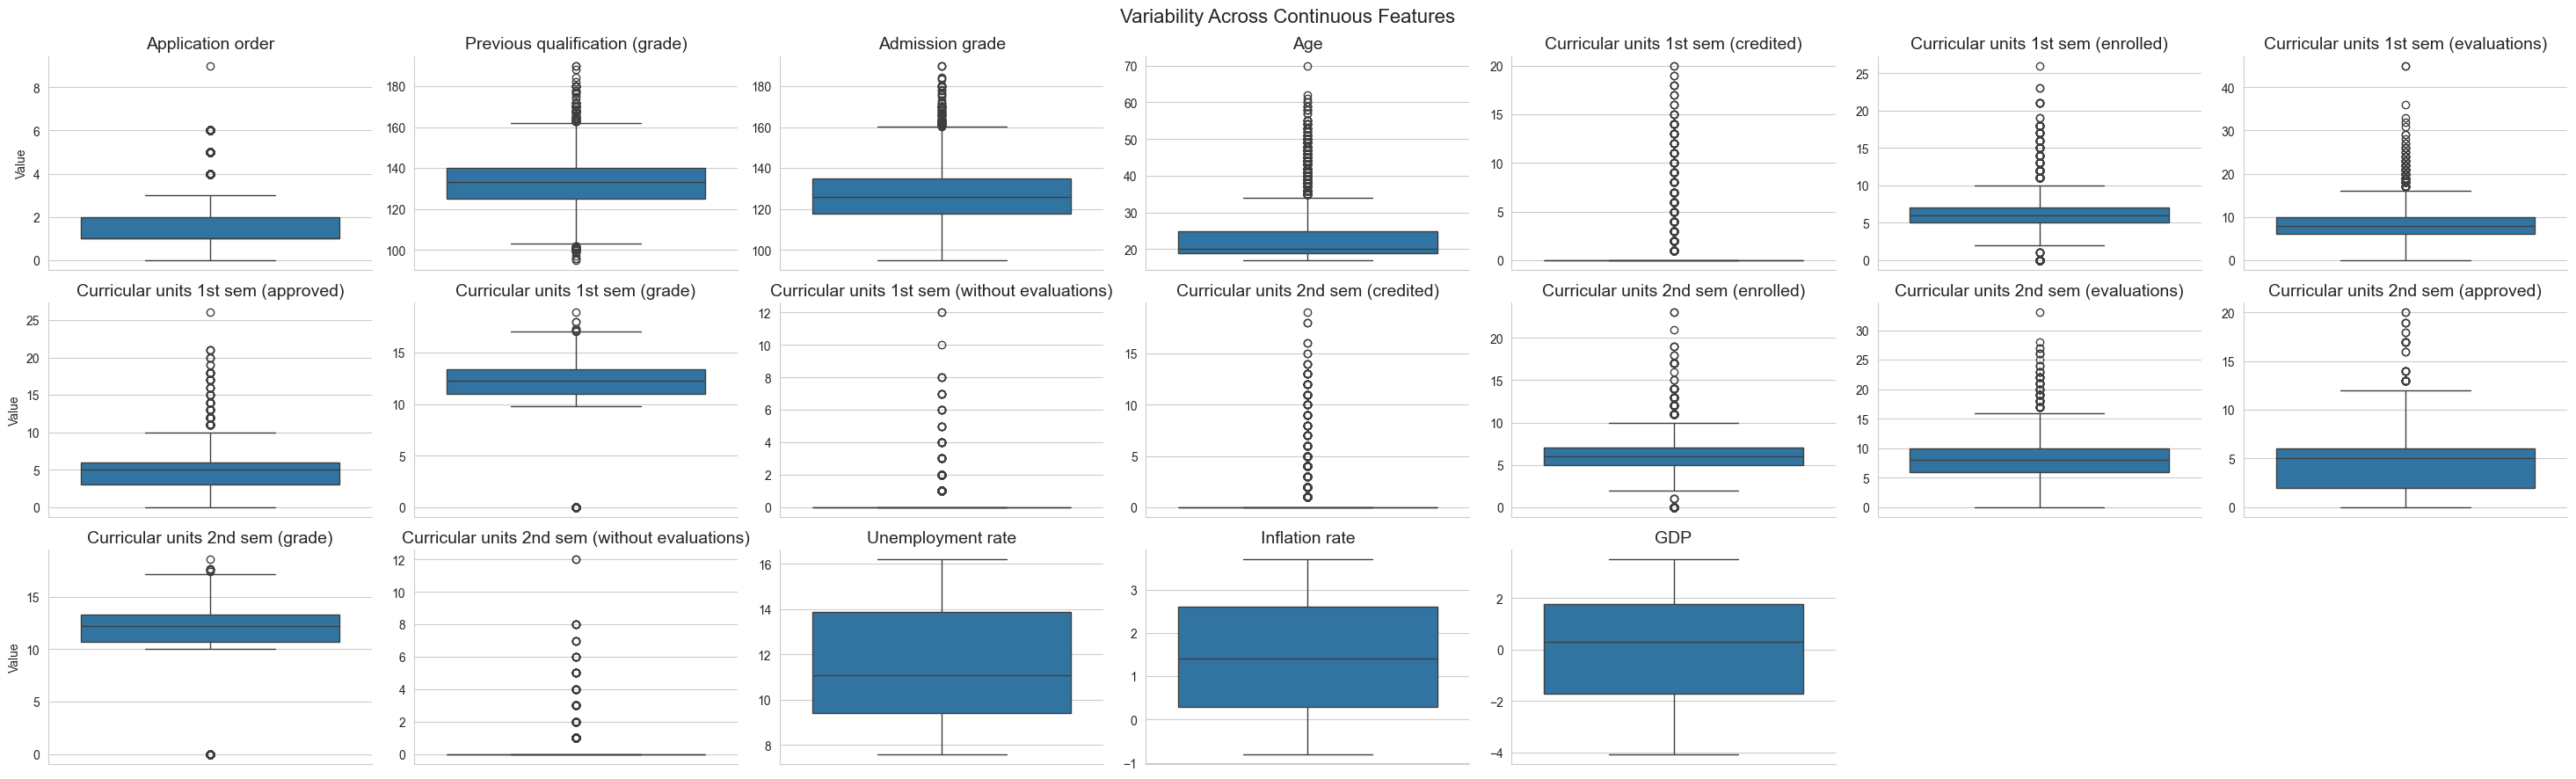

In [157]:
facet_plots(df_continuous, 'box', 7, 'Variability Across Continuous Features')

##### Histograms

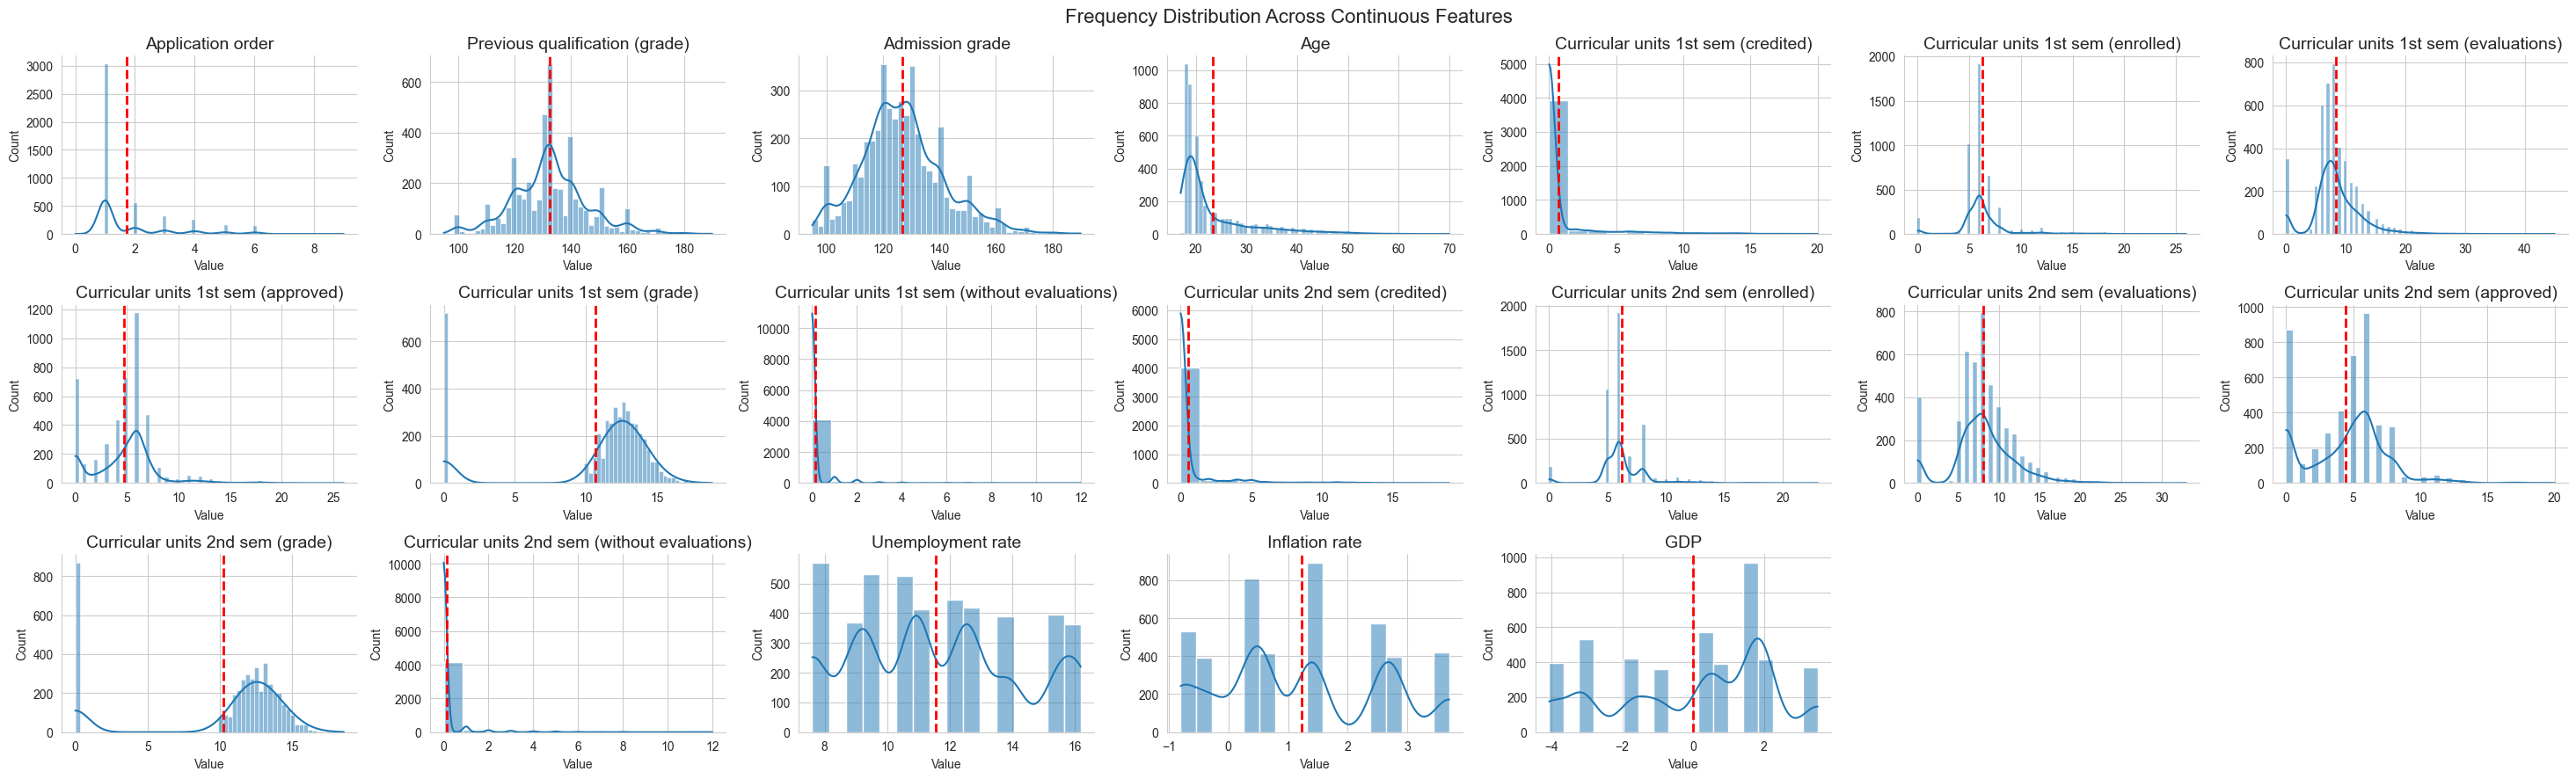

In [158]:
facet_plots(df_continuous, 'hist', 7, 'Frequency Distribution Across Continuous Features')

#### Discrete Attributes

##### Countplots

C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\1006714791.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\1006714791.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\1006714791.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\1006714791.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

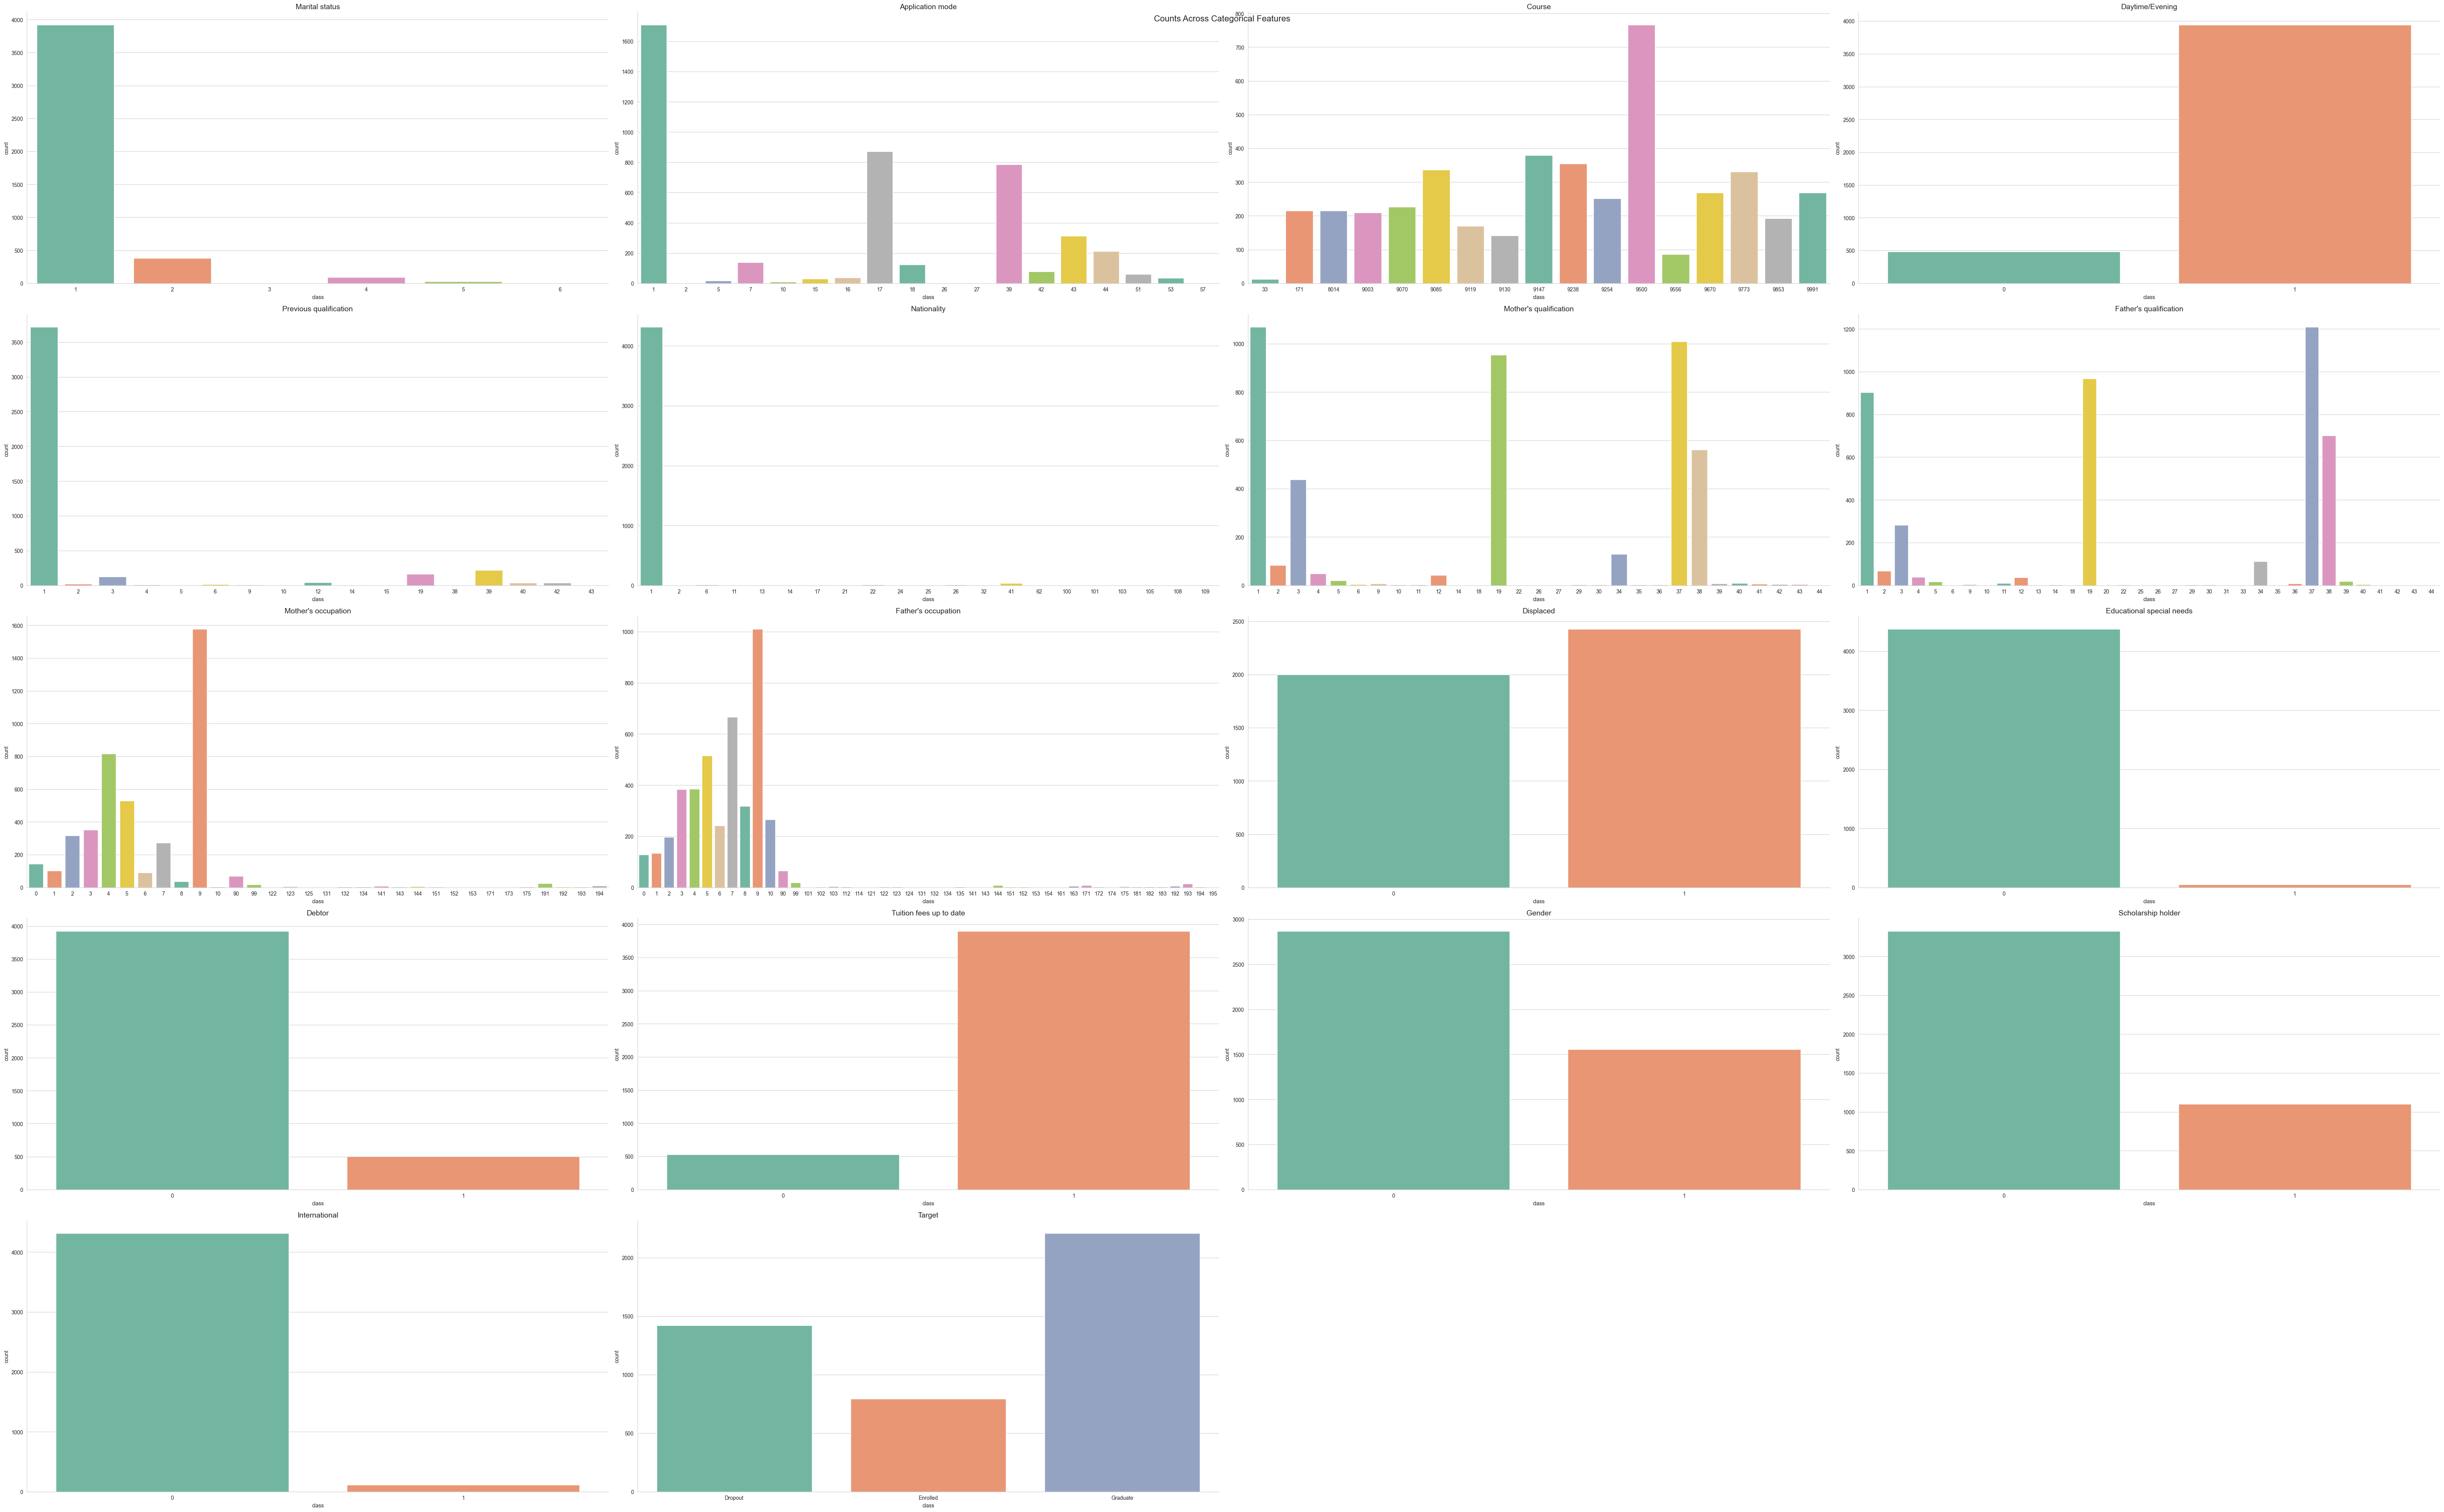

In [254]:
facet_plots(df_categorical, 'count', 4, 'Counts Across Categorical Features')

##### Tree Maps

In [160]:
# Interactive tree maps
def treemap_plot(df, col_name, mapping=feature_mappings):
    # Map numeric codes to occupation mappings (descriptive names)
    mapped = df[col_name].map(mapping[col_name])
    # Count frequencies of occupations
    counts = mapped.value_counts().reset_index()
    counts.columns = ["Category", "Count"]

    # Build single treemap
    fig = go.Figure(go.Treemap(
        labels=counts["Category"],   # Mapped names
        parents=[""] * len(counts),
        values=counts["Count"],
        textinfo="label+value",
        name=f"{col_name} Treemap"
    ))

    # Treemap plot layout
    fig.update_layout(
        title_text=f"Treemap of {col_name}",
        title_x=0.5,
        margin=dict(t=80, l=0, r=0, b=0),
        showlegend=False,
        height = 600
    )
    fig.show()


##### Father's occupation

In [237]:
#treemap_plot(df_categorical, "Father's occupation")
# Commented to reduce processing time of notebook

##### Mother's occupation

In [162]:
#treemap_plot(df_categorical, "Mother's occupation", occupation_mapping)

##### Father's qualification

In [163]:
#treemap_plot(df_categorical, "Father's qualification", occupation_mapping)

##### Mother's qualification

In [164]:
#treemap_plot(df_categorical, "Mother's occupation", occupation_mapping)

## Multivariate Analysis

### Correlation Heatmap

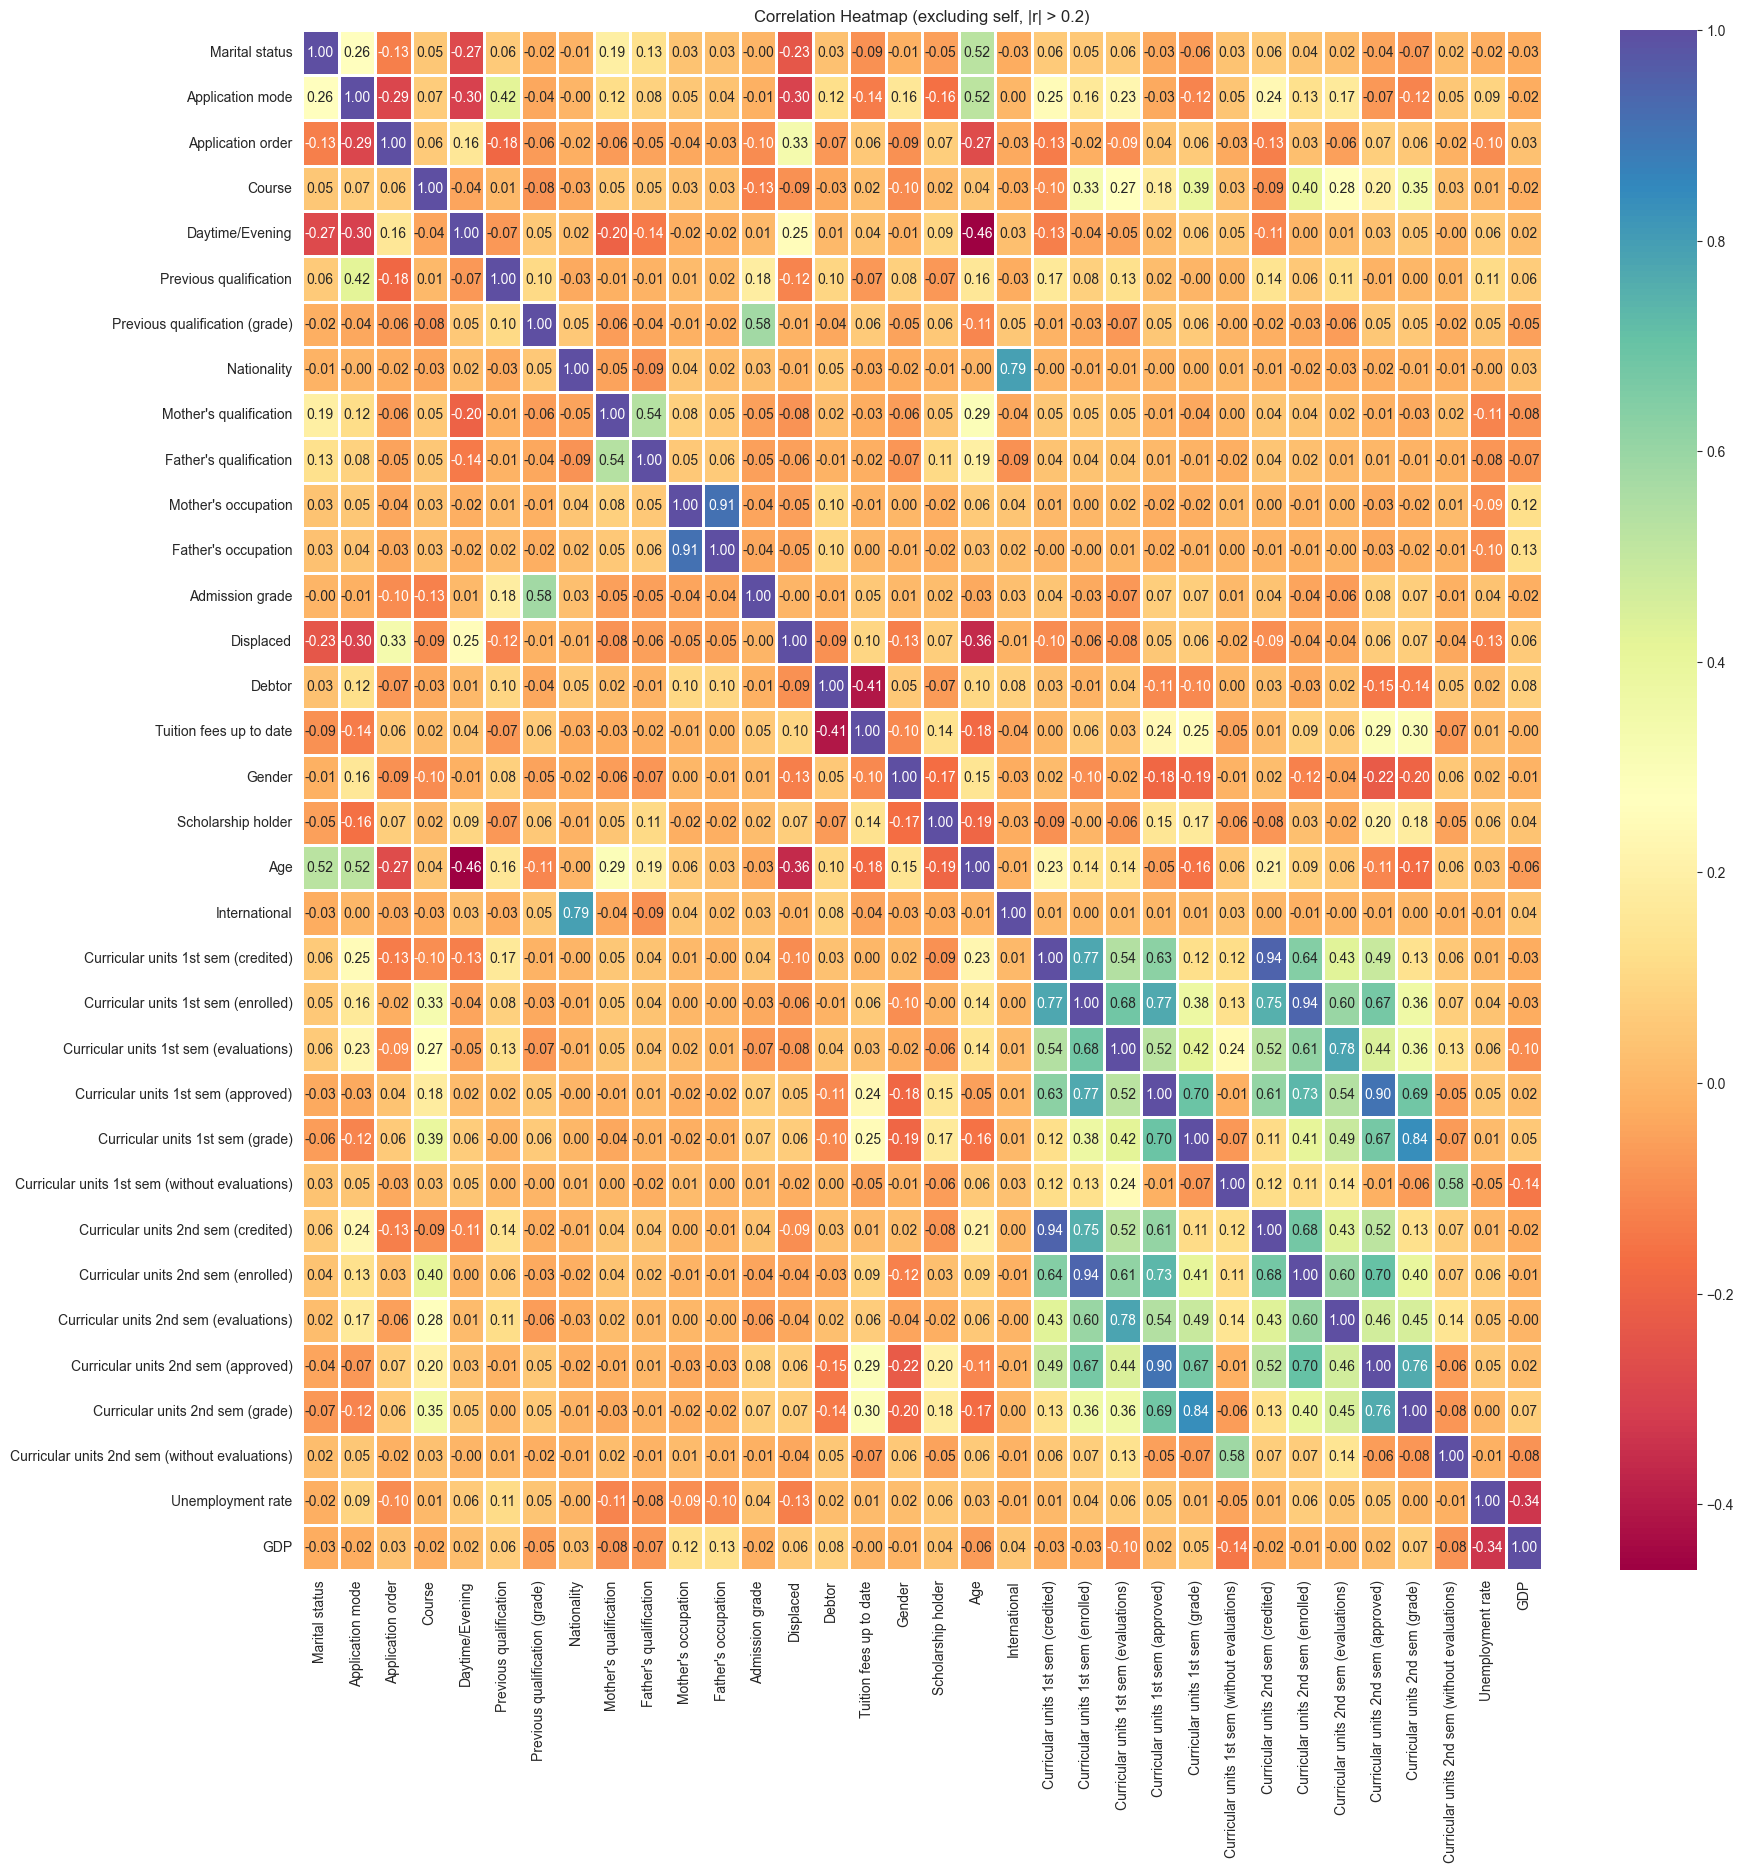

In [165]:
'''
Objective: Identify features with highest correlation to target variable
'''
# Binary encoding for correlation calculations
df_encoded = df_eda.copy()
df_encoded['Target'] = np.where(df_temp['Target'].isin(['Engaged', 'Dropout']), 1, 0)

# Compute correlation matrix
corr = df_encoded.corr()

# Threshold to exclude features too weak
threshold = 0.2

# Keep features with stronger correlations than theshold
mask = corr.apply(lambda col: col.drop(labels=[col.name]).abs().max() > threshold, axis=0)
filtered_corr = corr.loc[mask, mask]

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr, annot=True, fmt='.2f', cmap='Spectral', linewidths=1)
plt.title(f'Correlation Heatmap (excluding self, |r| > {threshold})')
plt.show()

### Q1 - How do demographical factors affect student success rates?

#### Stacked Bar

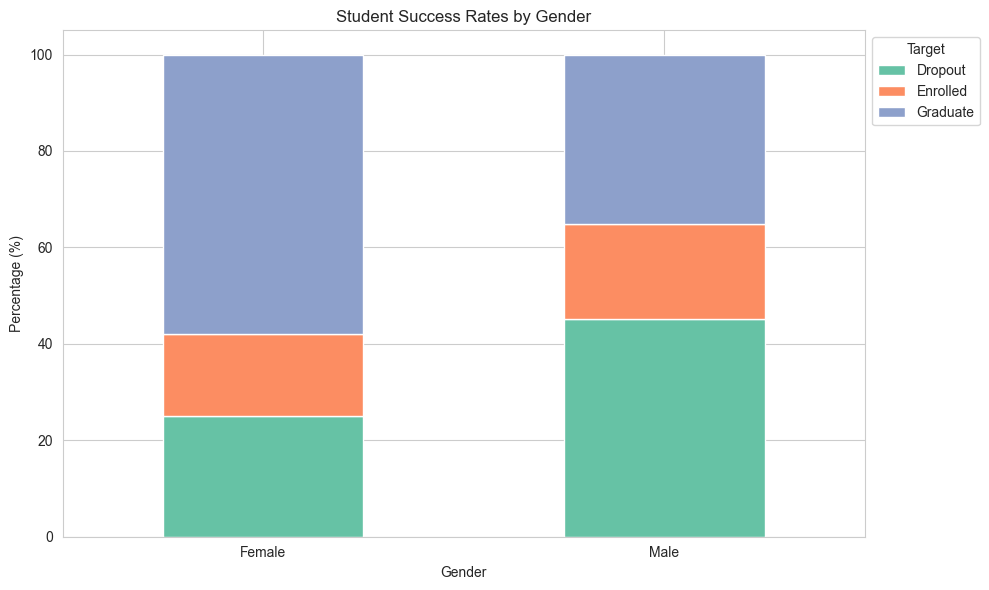

In [166]:
def stacked_bar_success(df, demographic_col, mappings=feature_mappings, target_col='Target'):
    try:
        # Map numeric codes to attribute mappings (descriptive names)
        df[demographic_col] = df[demographic_col].map(mappings[col])
    except KeyError:
        pass

    # Count values of attribute
    counts = df.groupby([demographic_col, target_col]).size().reset_index(name='count')
    
    # Pivot to wide format for stacked plot
    df_pivot = counts.pivot(index=demographic_col, columns=target_col, values='count').fillna(0)
    
    # Normalise to percentages
    df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

    # Set palette by num of categories
    palette = sns.color_palette("Set2", n_colors=df_pivot.shape[1])
    
    # Plot the graph
    ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
    plt.title(f"Student Success Rates by {demographic_col}")
    plt.ylabel("Percentage (%)")
    plt.xlabel(demographic_col)
    plt.legend(title=target_col, bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Gender
df_temp = df_eda.copy()
stacked_bar_success(df_temp, 'Gender')


#### Faceted Stacked Bar Charts

C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\1165265624.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0, wrap=True, ha="center")
C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\1165265624.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0, wrap=True, ha="center")
C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\1165265624.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0, wrap=True, ha="center")
C:\Users\evakt\AppData\Local\Temp\ipykernel_23500\1165265624.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of tick

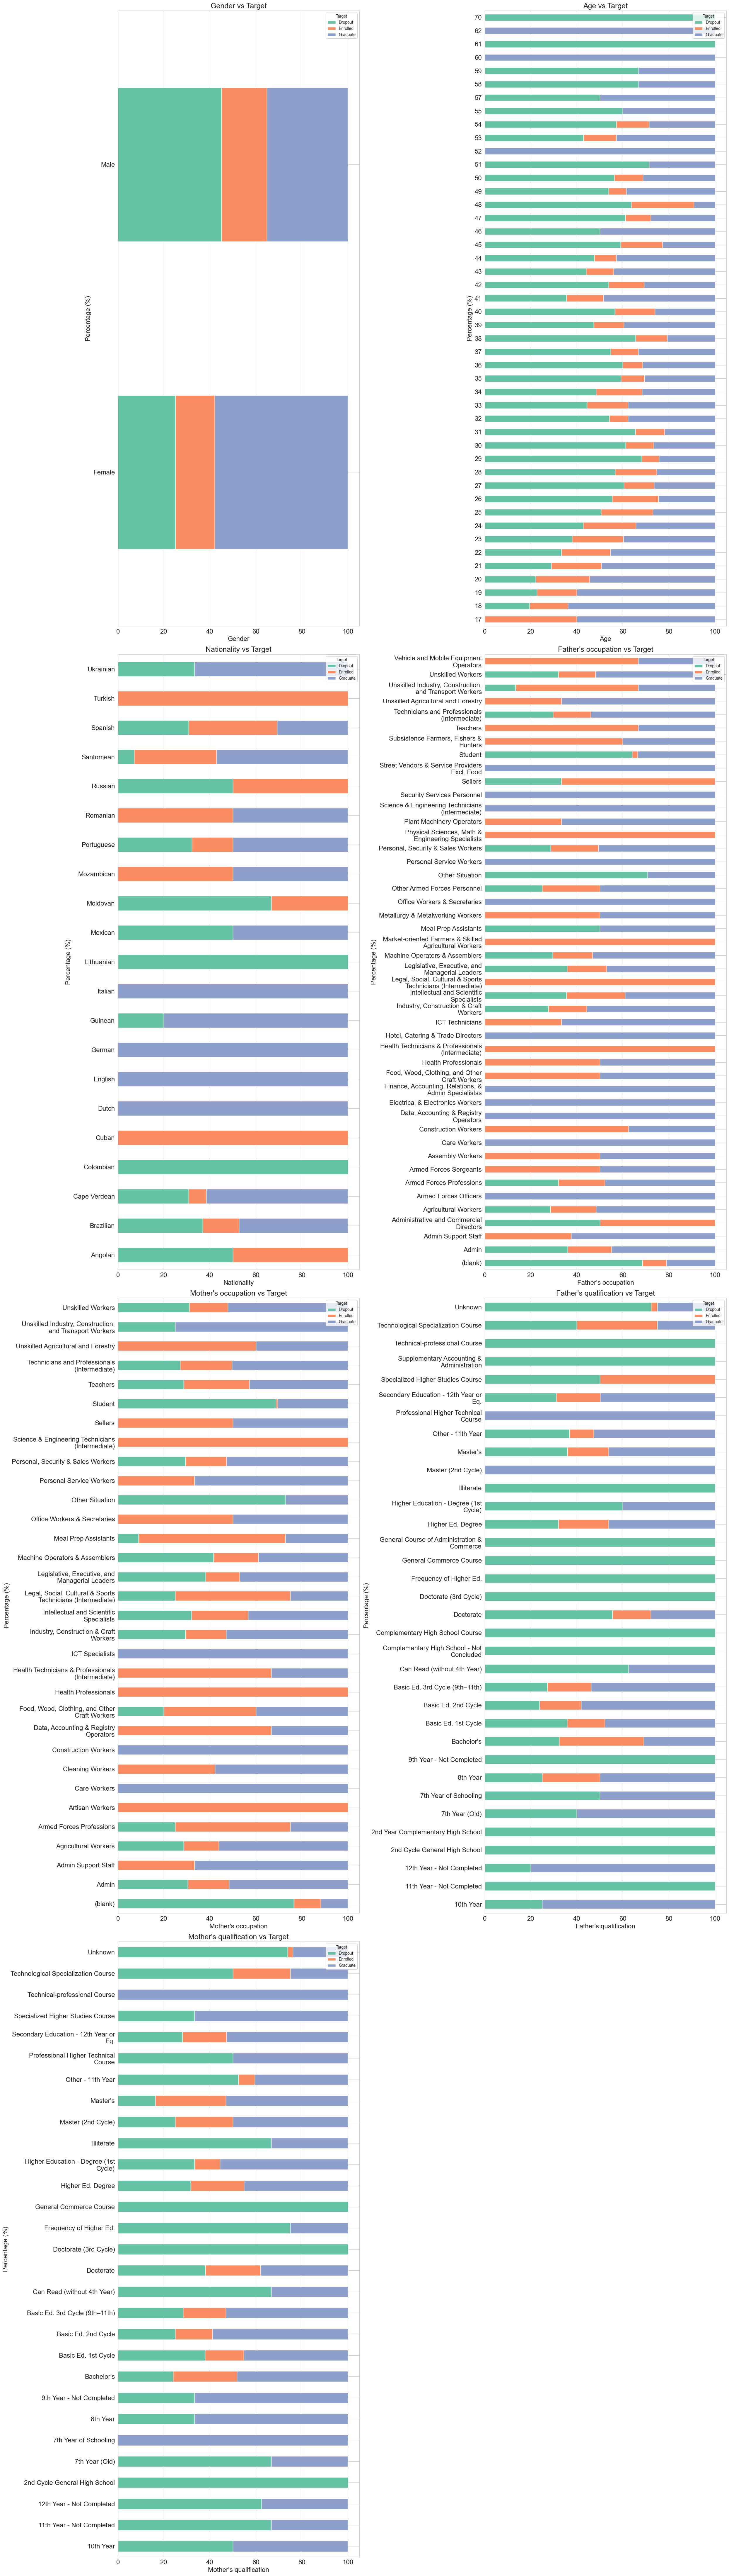

In [234]:
def faceted_stacked_bar(df, demographic_cols, mappings=feature_mappings, col_wrap=2, target_col='Target'):
    # Map numeric codes to occupation mappings (descriptive names)
    for col in demographic_cols:
        try:
            df[col] = df[col].map(mappings[col])
        except KeyError:
            pass
            
    # Number of attributes / plots per row
    rows = np.ceil(len(demographic_cols)/ col_wrap).astype('int')
    # Create subplots per specified column and number of plots
    fig, axes = plt.subplots(rows, col_wrap, figsize=(25, 22*rows))
    axes = axes.flatten()
    
    # Calculate number pf values per column and divide stacked bars
    for i, col in enumerate(demographic_cols):
        counts = df.groupby([col, target_col]).size().reset_index(name='count')
        df_pivot = counts.pivot(index=col, columns=target_col, values='count').fillna(0)
        df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100
        
        # Palette by num of categories
        palette = sns.color_palette("Set2", n_colors=df_pivot.shape[1])

        # Wrap long labels
        wrapped_labels = [textwrap.fill(str(label), width=35) for label in df_pivot.index]
        df_pivot.index = wrapped_labels

        # Plot horizontal stacked bar
        df_pivot.plot(kind="barh", stacked=True, ax=axes[i], color=palette)

        # Set plot axes, sizes, and titles
        axes[i].tick_params(labelsize=16) 
        axes[i].set_title(f"{col} vs {target_col}")
        axes[i].title.set_fontsize(18)
        axes[i].set_ylabel("Percentage (%)", fontsize=16)
        axes[i].set_xlabel(col, fontsize=16)
        axes[i].legend(title=target_col, loc='upper right')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0, wrap=True, ha="center")
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    # Display plot
    plt.tight_layout()
    plt.show()

demographic_cols = ['Gender', 'Age', 'Nationality', 
                    "Father's occupation", "Mother's occupation", 
                    "Father's qualification", "Mother's qualification"]
df_temp = df_eda.copy()
faceted_stacked_bar(df_temp, demographic_cols)


### Q2 - What is the impact of academic performance in the first semester on student dropout risk?

In [ ]:
# Count of dropouts and engaged against grades in semester 1 and semester 2 

# Stacked bar? Smester 1 vs Semester 2 bars against grades (y) in stacks of dropout vs graduate vs enrolled



### Q3 - Do national economic factors influence student dropout risk?

In [ ]:
# economic factors 
# a bar each for percentage of dropout and engaged (graduated and enrolled) for each economical factor

## Data Preparation

### Data Preprocessing

In [168]:
# Create copy to keep raw data for validation and reproducibility 
df_preprocessed = df.copy(deep=True)

#### Null Values

In [169]:
#(blank) and Unknown classes in columns

### Target Re-labeling

In [170]:
# Combine 'Graduate' and 'Enrolled' - Student Success (Engaged) vs Dropout
df_preprocessed['Target'] = df_preprocessed['Target'].replace({
    'Graduate':'Engaged',
    'Enrolled':'Engaged',
    'Dropout':'Dropout'
})

### Data Splitting

In [171]:
# Dataset Splitting 
X = df_preprocessed.drop(columns=['Target']) # All features excluding target (y)
y = df_preprocessed['Target'] # Target/predictive feature
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 80% train, 20% test
    stratify=y,      
    random_state=42 # Reproducible seed
)

### Encoding

In [172]:
# Identify categorical (non-continous) columns
list(set(df_preprocessed.columns) - set(df_preprocessed.describe().columns))

['Target']

In [173]:
df_preprocessed['Target'].unique()

array(['Dropout', 'Engaged'], dtype=object)

In [174]:
# Map categorical target variable to unique numerical variable with label encoding 
le = LabelEncoder() # Instantiate object

# Apply encoding of "Target" to train and test data 
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Check encoding has applied
print(le.classes_, np.unique(y_test_encoded)) 

['Dropout' 'Engaged'] [0 1]


In [175]:
# Integrate into df for feature engineering 
df_train = X_train.copy()
df_train['Target'] = y_train_encoded
df_train = df_train.reset_index(drop=True)

df_test = X_test.copy()
df_test['Target'] = y_test_encoded
df_test = df_test.reset_index(drop=True)

### Standardisation and Normalisation

In [176]:
df_train.head(10)

,Marital status,Application mode,Application order,Course,Daytime/Evening,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,171,1,1,140.0,1,19,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,1,2,9147,1,1,132.0,1,1,19,...,0,5,12,3,10.500000,0,13.9,-0.3,0.79,1
2,1,1,1,9238,1,1,116.0,1,38,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
3,1,44,1,9003,1,39,160.0,1,37,37,...,0,6,10,6,13.000000,0,16.2,0.3,-0.92,1
4,1,1,2,9147,1,1,120.0,1,1,37,...,0,5,5,0,0.000000,0,11.1,0.6,2.02,0
5,1,7,1,9556,1,3,140.0,1,3,3,...,0,5,5,0,0.000000,0,13.9,-0.3,0.79,0
6,1,1,2,9500,1,1,149.0,1,19,38,...,0,8,8,7,12.914286,0,12.7,3.7,-1.70,1
7,1,17,1,9238,1,1,128.0,1,19,19,...,0,6,9,6,10.500000,0,12.4,0.5,1.79,1
8,1,17,1,9147,1,1,133.1,1,19,19,...,0,5,10,2,11.000000,3,16.2,0.3,-0.92,0
9,1,39,1,9556,1,1,133.1,6,3,3,...,0,5,10,0,0.000000,0,12.4,0.5,1.79,0


### Imbalanced Data

### Feature Engineering

In [177]:
df_feen = df_train.copy(deep=True)

#### Feature Aggregation

In [178]:
# Aggregate nationalities
df_feen['Nationality'].unique()

array([  1,   6,  41,   2,  24,  11,  32,  22,  26, 100,  62, 105, 103,
       108, 101,  21,  25,  14,  13])

## Model Training